In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


pd.set_option('display.max_columns', None)

In [2]:
from shapely import wkt


In [3]:
gdf_summary = gpd.read_parquet("bases_analises/gdf_bootstrap_regioes.parquet")


In [16]:
df_summary = pd.read_excel("bases_analises/summary_bootstrap_regioes.xlsx")

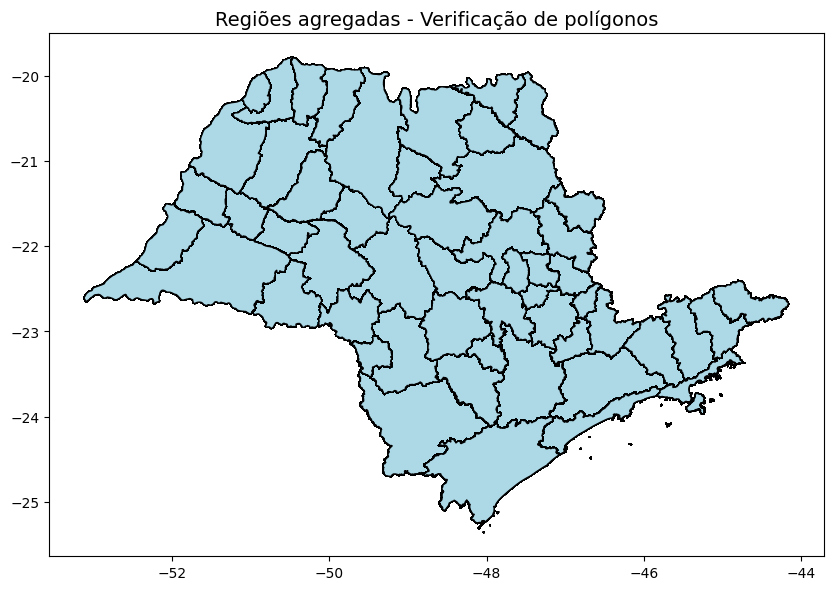

In [25]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf_summary.plot(ax=ax, color='lightblue', edgecolor='k')
ax.set_title("Regiões agregadas - Verificação de polígonos", fontsize=14)
plt.show()

In [27]:
gdf_summary.head(1)

,cod_regiao,nome_regiao,coluna,ano,media_mean,media_std,media_ci_lower,media_ci_upper,mediana_mean,mediana_std,mediana_mediana,p25_mediana,p75_mediana,inc_media_amp,inc_media_cv,skew_media,kurt_media,n_peaks,diagnostico_estabilidade,diagnostico_assimetria,diagnostico_curtose,diagnostico_multimodal,valor_representativo,geometry
0,350001,São Paulo,ipca_alimentos_bebidas,2018,4.030782,0.0,4.030782,4.030782,4.030782,0.0,4.030782,4.030782,4.030782,0.0,4.406978e-16,1.001503,-2.004012,0.0,Alta estabilidade,Assimétrica à direita,Platicúrtica (achatada),Multimodal,4.030782,"POLYGON ((-47.00221 -24.05627, -47.00285 -24.0..."


In [20]:
df_wide = gdf_summary.pivot_table(
    index=['ano', 'cod_regiao', 'nome_regiao', 'geometry'],
    columns='coluna',
    values='mediana_mean'
).reset_index()

In [21]:
type(df_wide['geometry'])

pandas.core.series.Series

In [22]:
df_wide_polig = gpd.GeoDataFrame(df_wide, geometry='geometry')

## Setting interesting variables to make analyses


In [ ]:
# voltar e incluir o emprego_formal_percapta

In [41]:
interesting_variables = ['per_capita_massa_rendimentos','per_capita_pib', 'per_capita_pib_agropecuaria',
'per_capita_pib_industria', 'perc_Ido_BPC','perc_Pop_65_mais','perc_pes_insc_cadun' , 'taxa_qtd_formal_Indústria_de_Transformação', 'taxa_qtd_formal_escolaridade_4']

ipca_alimentos_bebidas	ipca_artigos_residencia	ipca_comunicacao	ipca_despesas_pessoais	ipca_educacao	ipca_geral
ipca_habitacao	ipca_saude_cuidados_pessoais	ipca_transportes	ipca_vestuario	per_capita_massa_rendimentos
per_capita_pib	per_capita_pib_agropecuaria	per_capita_pib_impostos_liq_sub	per_capita_pib_industria
per_capita_pib_servicos	per_capita_pib_servicos_adm_publica	per_capita_pib_valor_add	perc_65_menos_Idoso_BPC	
perc_Ido_BPC	perc_PCD_BPC	perc_Pes_PBF	perc_Pop_65_mais	perc_cadunicoF_CAD_EP	perc_cadunicoFam_PBF
perc_n_fam_rua	perc_pes_insc_cadun	perc_pes_rf_ate_meio_sm	taxa_qtd_formal_Administração_Pública
taxa_qtd_formal_Agropecuária	taxa_qtd_formal_Alojamento_e_Alimentação	taxa_qtd_formal_Artes_e_Cultura
taxa_qtd_formal_Atividades_Imobiliárias	taxa_qtd_formal_Atividades_Profissionais_e_Técnicas
taxa_qtd_formal_Comércio	taxa_qtd_formal_Construção	taxa_qtd_formal_Educação
taxa_qtd_formal_Eletricidade_e_Gás	taxa_qtd_formal_Indústria_de_Transformação	taxa_qtd_formal_Indústrias_Extrativas
taxa_qtd_formal_Informação_e_Comunicação	taxa_qtd_formal_Organismos_Internacionais	taxa_qtd_formal_Outros_Serviços
taxa_qtd_formal_Saneamento_e_Resíduos	taxa_qtd_formal_Saúde	taxa_qtd_formal_Serviços_Administrativos
taxa_qtd_formal_Serviços_Domésticos	taxa_qtd_formal_Serviços_Financeiros	taxa_qtd_formal_Transporte_e_Correios
taxa_qtd_formal_escolaridade_0	taxa_qtd_formal_escolaridade_1	taxa_qtd_formal_escolaridade_2
taxa_qtd_formal_escolaridade_3	taxa_qtd_formal_escolaridade_4

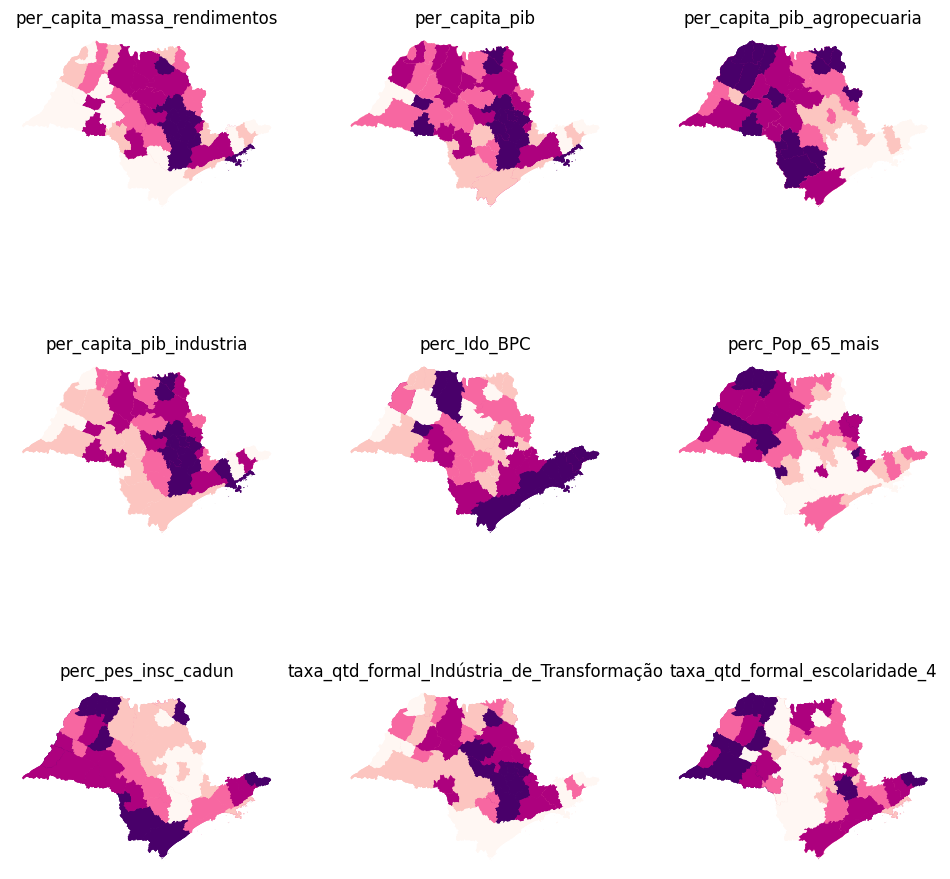

In [ ]:
f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

axs = axs.flatten()

for i, col in enumerate(interesting_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    df_wide_polig.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="RdPu",
    )
    ax.set_axis_off()
    ax.set_title(col)
plt.show()

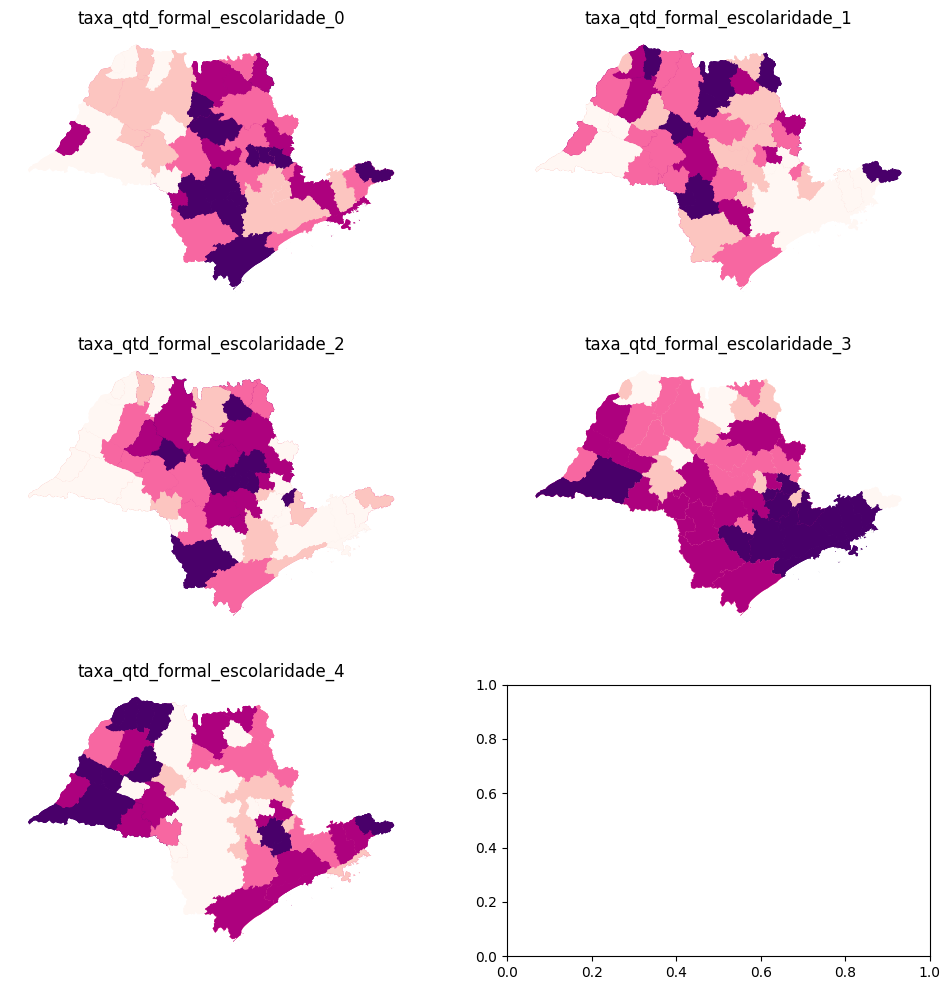

In [ ]:
escolaridade = [ 'taxa_qtd_formal_escolaridade_0','taxa_qtd_formal_escolaridade_1','taxa_qtd_formal_escolaridade_2',
'taxa_qtd_formal_escolaridade_3','taxa_qtd_formal_escolaridade_4']


f, axs = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

axs = axs.flatten()

for i, col in enumerate(escolaridade):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    df_wide_polig.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="RdPu",
    )
    ax.set_axis_off()
    ax.set_title(col)
plt.show()

## Filtragem por variância / estabilidade (usando bootstrap)

In [79]:
df_summary

,cod_regiao,nome_regiao,coluna,ano,media_mean,media_std,media_ci_lower,media_ci_upper,mediana_mean,mediana_std,mediana_mediana,p25_mediana,p75_mediana,inc_media_amp,inc_media_cv,skew_media,kurt_media,n_peaks,diagnostico_estabilidade,diagnostico_assimetria,diagnostico_curtose,diagnostico_multimodal,valor_representativo
0,350001,São Paulo,ipca_alimentos_bebidas,2018,4.030782,0.000000,4.030782,4.030782,4.030782,0.000000,4.030782,4.030782,4.030782,0.000000,4.406978e-16,1.001503,-2.004012,0.0,Alta estabilidade,Assimétrica à direita,Platicúrtica (achatada),Multimodal,4.030782
1,350001,São Paulo,ipca_alimentos_bebidas,2019,6.364091,0.000000,6.364091,6.364091,6.364091,0.000000,6.364091,6.364091,6.364091,0.000000,1.395609e-16,NaN,NaN,0.0,Alta estabilidade,Sem dados,Sem dados,Multimodal,6.364091
2,350001,São Paulo,ipca_alimentos_bebidas,2020,14.113456,0.000000,14.113456,14.113456,14.113456,0.000000,14.113456,14.113456,14.113456,0.000000,1.258626e-16,NaN,NaN,0.0,Alta estabilidade,Sem dados,Sem dados,Multimodal,14.113456
3,350001,São Paulo,ipca_artigos_residencia,2018,3.759616,0.000000,3.759616,3.759616,3.759616,0.000000,3.759616,3.759616,3.759616,0.000000,3.543627e-16,1.001503,-2.004012,0.0,Alta estabilidade,Assimétrica à direita,Platicúrtica (achatada),Multimodal,3.759616
4,350001,São Paulo,ipca_artigos_residencia,2019,-0.377431,0.000000,-0.377431,-0.377431,-0.377431,0.000000,-0.377431,-0.377431,-0.377431,0.000000,-1.470762e-16,NaN,NaN,0.0,Alta estabilidade,Sem dados,Sem dados,Multimodal,-0.377431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8581,350053,Cruzeiro,taxa_qtd_formal_escolaridade_3,2019,0.459495,0.032515,0.402823,0.525671,0.431652,0.033350,0.429942,0.420859,0.435995,0.122848,7.072690e-02,0.350085,-0.072940,1.0,Moderada,Assimétrica à direita,Mesocúrtica (normal),Unimodal,0.429942
8582,350053,Cruzeiro,taxa_qtd_formal_escolaridade_3,2020,0.461916,0.033169,0.404992,0.532647,0.430527,0.041551,0.411921,0.408840,0.437008,0.127655,7.177244e-02,0.380876,-0.180515,1.0,Moderada,Assimétrica à direita,Mesocúrtica (normal),Unimodal,0.411921
8583,350053,Cruzeiro,taxa_qtd_formal_escolaridade_4,2018,0.187122,0.013319,0.160580,0.213762,0.188244,0.024277,0.193905,0.171053,0.204626,0.053182,7.113993e-02,0.053137,0.013942,1.0,Moderada,Simétrica,Mesocúrtica (normal),Unimodal,0.187122
8584,350053,Cruzeiro,taxa_qtd_formal_escolaridade_4,2019,0.192221,0.010760,0.171024,0.213555,0.194334,0.020473,0.201037,0.172370,0.214470,0.042531,5.594964e-02,0.008526,-0.151112,1.0,Moderada,Simétrica,Mesocúrtica (normal),Unimodal,0.192221


In [ ]:
df_summary[df_summary['inc_media_cv'] < 0.15] 

,cod_regiao,nome_regiao,coluna,ano,media_mean,media_std,media_ci_lower,media_ci_upper,mediana_mean,mediana_std,mediana_mediana,p25_mediana,p75_mediana,inc_media_amp,inc_media_cv,skew_media,kurt_media,n_peaks,diagnostico_estabilidade,diagnostico_assimetria,diagnostico_curtose,diagnostico_multimodal,valor_representativo
0,350001,São Paulo,ipca_alimentos_bebidas,2018,4.030782,0.000000,4.030782,4.030782,4.030782,0.000000,4.030782,4.030782,4.030782,0.000000,4.406978e-16,1.001503,-2.004012,0.0,Alta estabilidade,Assimétrica à direita,Platicúrtica (achatada),Multimodal,4.030782
1,350001,São Paulo,ipca_alimentos_bebidas,2019,6.364091,0.000000,6.364091,6.364091,6.364091,0.000000,6.364091,6.364091,6.364091,0.000000,1.395609e-16,NaN,NaN,0.0,Alta estabilidade,Sem dados,Sem dados,Multimodal,6.364091
2,350001,São Paulo,ipca_alimentos_bebidas,2020,14.113456,0.000000,14.113456,14.113456,14.113456,0.000000,14.113456,14.113456,14.113456,0.000000,1.258626e-16,NaN,NaN,0.0,Alta estabilidade,Sem dados,Sem dados,Multimodal,14.113456
3,350001,São Paulo,ipca_artigos_residencia,2018,3.759616,0.000000,3.759616,3.759616,3.759616,0.000000,3.759616,3.759616,3.759616,0.000000,3.543627e-16,1.001503,-2.004012,0.0,Alta estabilidade,Assimétrica à direita,Platicúrtica (achatada),Multimodal,3.759616
4,350001,São Paulo,ipca_artigos_residencia,2019,-0.377431,0.000000,-0.377431,-0.377431,-0.377431,0.000000,-0.377431,-0.377431,-0.377431,0.000000,-1.470762e-16,NaN,NaN,0.0,Alta estabilidade,Sem dados,Sem dados,Multimodal,-0.377431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8581,350053,Cruzeiro,taxa_qtd_formal_escolaridade_3,2019,0.459495,0.032515,0.402823,0.525671,0.431652,0.033350,0.429942,0.420859,0.435995,0.122848,7.072690e-02,0.350085,-0.072940,1.0,Moderada,Assimétrica à direita,Mesocúrtica (normal),Unimodal,0.429942
8582,350053,Cruzeiro,taxa_qtd_formal_escolaridade_3,2020,0.461916,0.033169,0.404992,0.532647,0.430527,0.041551,0.411921,0.408840,0.437008,0.127655,7.177244e-02,0.380876,-0.180515,1.0,Moderada,Assimétrica à direita,Mesocúrtica (normal),Unimodal,0.411921
8583,350053,Cruzeiro,taxa_qtd_formal_escolaridade_4,2018,0.187122,0.013319,0.160580,0.213762,0.188244,0.024277,0.193905,0.171053,0.204626,0.053182,7.113993e-02,0.053137,0.013942,1.0,Moderada,Simétrica,Mesocúrtica (normal),Unimodal,0.187122
8584,350053,Cruzeiro,taxa_qtd_formal_escolaridade_4,2019,0.192221,0.010760,0.171024,0.213555,0.194334,0.020473,0.201037,0.172370,0.214470,0.042531,5.594964e-02,0.008526,-0.151112,1.0,Moderada,Simétrica,Mesocúrtica (normal),Unimodal,0.192221


In [ ]:
# variáveis não estáveis
# retirar essas variáveis da análise?
df_summary[df_summary['inc_media_cv'] > 0.35].coluna.value_counts() 

coluna
taxa_qtd_formal_Indústrias_Extrativas                  140
taxa_qtd_formal_Eletricidade_e_Gás                     124
taxa_qtd_formal_Atividades_Imobiliárias                108
taxa_qtd_formal_Serviços_Domésticos                    101
taxa_qtd_formal_Artes_e_Cultura                         93
taxa_qtd_formal_Informação_e_Comunicação                82
taxa_qtd_formal_Educação                                79
taxa_qtd_formal_Saúde                                   75
taxa_qtd_formal_Serviços_Administrativos                72
taxa_qtd_formal_Construção                              67
taxa_qtd_formal_Saneamento_e_Resíduos                   62
per_capita_pib_industria                                53
perc_n_fam_rua                                          48
per_capita_pib_agropecuaria                             32
taxa_qtd_formal_Outros_Serviços                         24
taxa_qtd_formal_Agropecuária                            24
taxa_qtd_formal_Alojamento_e_Alimentação         

## Tentar ver alguma correlação

In [70]:
target = 'perc_pes_insc_cadun'
top_vars_por_regiao = {}

drop_columns = ['ano',
 'geometry',
 'ipca_alimentos_bebidas',
 'ipca_artigos_residencia',
 'ipca_comunicacao',
 'ipca_despesas_pessoais',
 'ipca_educacao',
 'ipca_geral',
 'ipca_habitacao',
 'ipca_saude_cuidados_pessoais',
 'ipca_transportes',
 'ipca_vestuario']

for reg, df_reg in df_wide.drop(columns=drop_columns).groupby('nome_regiao'):
    df_num = df_reg.select_dtypes(include='number').dropna(axis=1, how='all')
    
    if target in df_num.columns:
        # Correlação (aqui usando Spearman)
        corr_target = df_num.corr(method='spearman')[target].sort_values(key=abs, ascending=False)
        
        # Guardar top 5 como dicionário {variável: valor_corr}
        top_vars_por_regiao[reg] = corr_target.head(5).to_dict()

In [71]:
top_vars_por_regiao

{'Adamantina - Lucélia': {'per_capita_massa_rendimentos': 1.0,
  'per_capita_pib': -1.0,
  'per_capita_pib_agropecuaria': -1.0,
  'per_capita_pib_impostos_liq_sub': -1.0,
  'per_capita_pib_industria': -1.0},
 'Amparo': {'per_capita_pib': 1.0,
  'per_capita_pib_agropecuaria': 1.0,
  'per_capita_pib_industria': 1.0,
  'perc_Ido_BPC': 1.0,
  'per_capita_pib_servicos_adm_publica': 1.0},
 'Andradina': {'taxa_qtd_formal_Saneamento_e_Resíduos': -1.0,
  'taxa_qtd_formal_Serviços_Financeiros': 1.0,
  'taxa_qtd_formal_Artes_e_Cultura': -1.0,
  'taxa_qtd_formal_Alojamento_e_Alimentação': 1.0,
  'taxa_qtd_formal_Comércio': -1.0},
 'Araraquara': {'per_capita_massa_rendimentos': -1.0,
  'per_capita_pib': -1.0,
  'per_capita_pib_impostos_liq_sub': -1.0,
  'per_capita_pib_industria': -1.0,
  'per_capita_pib_servicos': -1.0},
 'Araras': {'perc_PCD_BPC': 1.0,
  'perc_pes_insc_cadun': 1.0,
  'perc_pes_rf_ate_meio_sm': 1.0,
  'taxa_qtd_formal_Informação_e_Comunicação': 1.0,
  'taxa_qtd_formal_Atividades_I

In [72]:
top_vars_por_regiao['São Paulo']

{'per_capita_pib': 1.0,
 'per_capita_pib_agropecuaria': 1.0,
 'perc_65_menos_Idoso_BPC': -1.0,
 'per_capita_pib_industria': 1.0,
 'per_capita_pib_servicos': 1.0}

verificar isso melhor!!!

In [75]:
for reg, df_reg in df_wide.drop(columns=drop_columns).groupby('nome_regiao'):
    df_num = df_reg.select_dtypes(include='number').dropna(axis=1, how='all')
    
    if target in df_num.columns:
        # Correlação (aqui usando Spearman)
        corr_target = df_num.corr(method='kendall')[target].sort_values(key=abs, ascending=False)
        
        # Guardar top 5 como dicionário {variável: valor_corr}
        top_vars_por_regiao[reg] = corr_target.head(10).to_dict()

In [76]:
top_vars_por_regiao['São Paulo']

{'per_capita_pib': 1.0,
 'per_capita_pib_agropecuaria': 1.0,
 'perc_65_menos_Idoso_BPC': -1.0,
 'per_capita_pib_industria': 1.0,
 'per_capita_pib_servicos': 1.0,
 'per_capita_pib_servicos_adm_publica': 1.0,
 'perc_Ido_BPC': 1.0,
 'per_capita_pib_valor_add': 1.0,
 'perc_Pop_65_mais': -1.0,
 'perc_cadunicoF_CAD_EP': 1.0}

## Geographic Clusters

In [6]:
df_wide.head(1)

coluna,ano,cod_regiao,nome_regiao,geometry,ipca_alimentos_bebidas,ipca_artigos_residencia,ipca_comunicacao,ipca_despesas_pessoais,ipca_educacao,ipca_geral,ipca_habitacao,ipca_saude_cuidados_pessoais,ipca_transportes,ipca_vestuario,per_capita_massa_rendimentos,per_capita_pib,per_capita_pib_agropecuaria,per_capita_pib_impostos_liq_sub,per_capita_pib_industria,per_capita_pib_servicos,per_capita_pib_servicos_adm_publica,per_capita_pib_valor_add,perc_65_menos_Idoso_BPC,perc_Ido_BPC,perc_PCD_BPC,perc_Pes_PBF,perc_Pop_65_mais,perc_cadunicoF_CAD_EP,perc_cadunicoFam_PBF,perc_n_fam_rua,perc_pes_insc_cadun,perc_pes_rf_ate_meio_sm,taxa_qtd_formal_Administração_Pública,taxa_qtd_formal_Agropecuária,taxa_qtd_formal_Alojamento_e_Alimentação,taxa_qtd_formal_Artes_e_Cultura,taxa_qtd_formal_Atividades_Imobiliárias,taxa_qtd_formal_Atividades_Profissionais_e_Técnicas,taxa_qtd_formal_Comércio,taxa_qtd_formal_Construção,taxa_qtd_formal_Educação,taxa_qtd_formal_Eletricidade_e_Gás,taxa_qtd_formal_Indústria_de_Transformação,taxa_qtd_formal_Indústrias_Extrativas,taxa_qtd_formal_Informação_e_Comunicação,taxa_qtd_formal_Organismos_Internacionais,taxa_qtd_formal_Outros_Serviços,taxa_qtd_formal_Saneamento_e_Resíduos,taxa_qtd_formal_Saúde,taxa_qtd_formal_Serviços_Administrativos,taxa_qtd_formal_Serviços_Domésticos,taxa_qtd_formal_Serviços_Financeiros,taxa_qtd_formal_Transporte_e_Correios,taxa_qtd_formal_escolaridade_0,taxa_qtd_formal_escolaridade_1,taxa_qtd_formal_escolaridade_2,taxa_qtd_formal_escolaridade_3,taxa_qtd_formal_escolaridade_4
0,2018,350001,São Paulo,"POLYGON ((-47.00221 -24.05627, -47.00285 -24.0...",4.030782,3.759616,-0.080826,2.989517,5.31092,3.745482,4.724189,3.951694,4.202469,0.602078,514.183943,33940.400103,14.334417,5090.99625,6394.851347,15372.585506,3739.280672,27792.852949,0.069968,0.008875,0.006743,0.133151,0.079689,0.135914,0.1614,0.000431,0.261274,0.216668,0.121276,0.001463,0.03245,0.003443,0.001518,0.013577,0.222693,0.030545,0.028588,0.000001,0.223274,0.000393,0.006446,0.0,0.017746,0.00584,0.032021,0.072511,0.0,0.009693,0.055418,0.00157,0.07279,0.13149,0.604712,0.175838


In [ ]:
drop = ['ano', 'cod_regiao', 'nome_regiao', 'geometry',
'ipca_alimentos_bebidas','ipca_artigos_residencia','ipca_comunicacao',
'ipca_despesas_pessoais','ipca_educacao','ipca_geral','ipca_habitacao',
'ipca_saude_cuidados_pessoais','ipca_transportes','ipca_vestuario',
]

In [8]:
df_cluster = df_wide.drop(columns=drop)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(df_cluster)

In [47]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_agg = agg.fit_predict(data_std)
df_cluster['cluster_agg'] = clusters_agg
df_cluster['cluster_agg'] = df_cluster['cluster_agg'].astype(str)

In [48]:
from matplotlib.colors import ListedColormap

palette = sns.color_palette('Set2', n_colors=len(set(clusters_agg)))

cmap = ListedColormap(palette.as_hex())

In [49]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

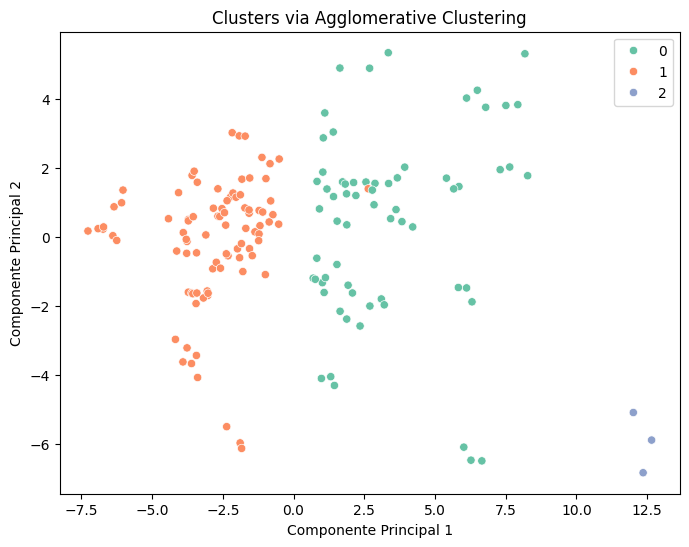

In [50]:
# Dimention reduction for 2D
pca = PCA(n_components=2)
reducao = pca.fit_transform(data_std)

plt.figure(figsize=(8,6))
sns.scatterplot(x=reducao[:,0], y=reducao[:,1], hue=clusters_agg, palette=palette)
plt.title('Clusters via Agglomerative Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

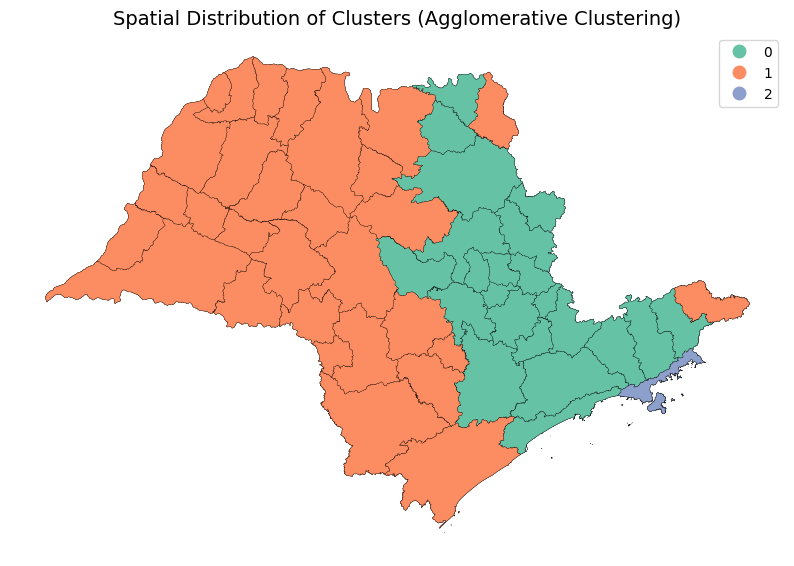

In [51]:
gdf_clusters = df_wide_polig.merge(df_cluster[['cluster_agg']], left_index=True, right_index=True)

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

gdf_clusters.plot(
    column='cluster_agg',
    cmap= cmap,  # Or 'tab10', 'Accent' — good qualitative color maps
    linewidth=0.2,
    edgecolor='black',
    legend=True,
    ax=ax
)

ax.set_title('Spatial Distribution of Clusters (Agglomerative Clustering)', fontsize=14)
ax.axis('off')

plt.show()

In [52]:
silhouette_score(df_cluster.drop(columns=['cluster_agg']), df_cluster['cluster_agg'])

np.float64(0.24505912182706002)

## GWR

In [62]:
import mgwr
from mgwr.gwr import GWR